In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score

In [21]:
# Loading Multiple  CSV
csv1 = pd.read_csv("Data1.csv")
csv1['Person'] = '1'

csv2 = pd.read_csv("Data2.csv")
csv2['Person'] = '2'

csv3 = pd.read_csv("Data3.csv")
csv3['Person'] = '3'

# Combine into one DataFrame
combined_df = pd.concat([csv1, csv2, csv3], ignore_index=True)

# Write to a new CSV file
combined_df.to_csv("combined_data.csv", index=False)

# Preprocessing

In [22]:
#Load and Display Combined Data
data = pd.read_csv("combined_data.csv")
data.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,124324,124325,124326,124327,124328,124329,124330,124331,124332,124333
ID,-NtRbm_DcFo4HGfcZkay,-NtRbo1VIt2ERLbqS0Hf,-NtRboLy4M2_SDxFFX5L,-NtRbp-ib_C7bf5Y7enP,-NtRbpI-9VoKY9uMQRfq,-NtRbpcNu9jEculqeSW2,-NtRbpzQTip1l6bTCwSD,-NtRbqJcUDI7Yd1K94L_,-NtRbqqD8zf_KeMknrFf,-NtRbrBzW6z3l0_8q3lx,...,-Nu8tiME6dl5ISK6NOCw,-Nu8tkF8EzSzR5alxTJQ,-Nu8tmCCDRaLDzCQL-yY,-Nu8to9IdMXkDs4FyKu7,-Nu8tq6Nn9EO7dHfOTdp,-Nu8ts3Um4Fj1NWOPzmX,-Nu8tu0TRXBdjyqRRtEJ,-Nu8tvyZX-3PEqBFZX_R,-Nu8txvcHcPneDSBxf3z,-Nu8tzshPyqr95_8nJZO
BPM,3.59,12.48,19.71,76.82,24.97,90.77,83.22,90.77,41.01,78.84,...,68.0,71.0,78.0,68.0,71.0,65.0,78.0,75.0,53.0,136.0
Date,"Thursday,-March-21-2024-00:08:37","Thursday,-March-21-2024-00:08:37","Thursday,-March-21-2024-00:08:45","Thursday,-March-21-2024-00:08:45","Thursday,-March-21-2024-00:08:45","Thursday,-March-21-2024-00:08:50","Thursday,-March-21-2024-00:08:50","Thursday,-March-21-2024-00:08:50","Thursday,-March-21-2024-00:08:55","Thursday,-March-21-2024-00:08:55",...,"Friday,-March-29-2024-19:09:45","Friday,-March-29-2024-19:09:54","Friday,-March-29-2024-19:10:02","Friday,-March-29-2024-19:10:10","Friday,-March-29-2024-19:10:18","Friday,-March-29-2024-19:10:26","Friday,-March-29-2024-19:10:34","Friday,-March-29-2024-19:10:42","Friday,-March-29-2024-19:10:50","Friday,-March-29-2024-19:10:58"
Person,1,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3


In [23]:
# Drop the date column and keep only the time from the 'Date' column
combined_df['Time'] = pd.to_datetime(combined_df['Date']).dt.time
# Drop the 'ID' and 'Date' columns from the DataFrame
combined_df.drop(['ID', 'Date'], axis=1, inplace=True)
# Remove any rows with missing values
combined_df.dropna(inplace=True)
# Convert the time to seconds
combined_df['Time'] = combined_df['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
# Save the cleaned DataFrame to a new CSV file
combined_df.to_csv("cleaned_data.csv", index=False)

In [24]:
# Load the cleaned csv then display it
data = pd.read_csv("cleaned_data.csv")
data.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,124257,124258,124259,124260,124261,124262,124263,124264,124265,124266
BPM,3.59,12.48,19.71,76.82,24.97,90.77,83.22,90.77,41.01,78.84,...,68.0,71.0,78.0,68.0,71.0,65.0,78.0,75.0,53.0,136.0
Person,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Time,517.00,517.00,525.00,525.00,525.00,530.00,530.00,530.00,535.00,535.00,...,68985.0,68994.0,69002.0,69010.0,69018.0,69026.0,69034.0,69042.0,69050.0,69058.0


In [52]:
# Set the ranges BPM >= 50 & <= 90.9 and remove the rest
combined_df = combined_df[(combined_df['BPM'] >= 50) & (combined_df['BPM'] <= 90.9)]
combined_df['State'] = 'Awake'
# Asleep = 50 to 75, Awake = 76 to 90.9
combined_df.loc[combined_df['BPM'] <= 75, 'State'] = 'Asleep'
# Save to a new CSV
combined_df.to_csv("sleep_data.csv", index=False)

In [2]:
# Load the Sleep Data CSV and Display
data = pd.read_csv("sleep_data.csv")
data.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,91449,91450,91451,91452,91453,91454,91455,91456,91457,91458
BPM,76.82,90.77,83.22,90.77,78.84,88.11,83.22,80.97,78.84,83.22,...,65.0,68.0,71.0,78.0,68.0,71.0,65.0,78.0,75.0,53.0
Person,1,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
Time,525,530,530,530,535,535,535,541,541,541,...,68969,68985,68994,69002,69010,69018,69026,69034,69042,69050
State,Awake,Awake,Awake,Awake,Awake,Awake,Awake,Awake,Awake,Awake,...,Asleep,Asleep,Asleep,Awake,Asleep,Asleep,Asleep,Awake,Asleep,Asleep


In [51]:
# Descriptive statistics of dataset
data.describe()

,BPM,Person,Time,BPM_change,BPM_change_threshold
count,91459.000000,91459.000000,91459.000000,91458.000000,91459.000000
mean,59.076990,2.017166,27929.021026,-0.000260,0.032845
std,8.604493,0.397941,14579.430495,5.641549,0.178233
min,50.000000,1.000000,400.000000,-38.230000,0.000000
25%,53.380000,2.000000,17285.000000,-2.250000,0.000000
50%,56.390000,2.000000,25817.000000,0.000000,0.000000
75%,59.760000,2.000000,34168.000000,2.290000,0.000000
max,90.770000,3.000000,86270.000000,40.010000,1.000000


In [38]:
#Setting a threshold if (BPM Jump >= 15 = Awake)
data['BPM_change'] = data['BPM'].diff()
data['BPM_change_threshold'] = data['BPM_change'].apply(lambda x: 1 if abs(x) >= 15 else 0)
# Identify consecutive instances where the person is awake after being classified as asleep
data['Awake_After_Asleep'] = (data['State'].shift(-1) == 'Awake') & (data['State'] == 'Asleep')

# Update the State column to classify the instances as awake if they meet the criteria
data.loc[data['Awake_After_Asleep'], 'State'] = 'Awake'

# Drop the temporary column
data.drop('Awake_After_Asleep', axis=1, inplace=True)

In [39]:
# Splitting the Data
X = data[['BPM', 'Time', 'BPM_change_threshold']]
y = data['State']

In [40]:
# Using Label Encoder for "State" Variable
le = LabelEncoder()
y = le.fit_transform(y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((73167, 3), (73167,), (18292, 3), (18292,))

In [42]:
# Normalize the  data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [47]:
# Train Logistic Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# Cross validation - Five Folds
lr_cv_accuracy = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_cv_predictions = cross_val_predict(lr_model, X_train, y_train, cv=5)
# Confusion Matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_train, lr_cv_predictions)

## Evaluation Metrics


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     65541
           1       0.89      0.82      0.85      7626

    accuracy                           0.97     73167
   macro avg       0.93      0.90      0.92     73167
weighted avg       0.97      0.97      0.97     73167


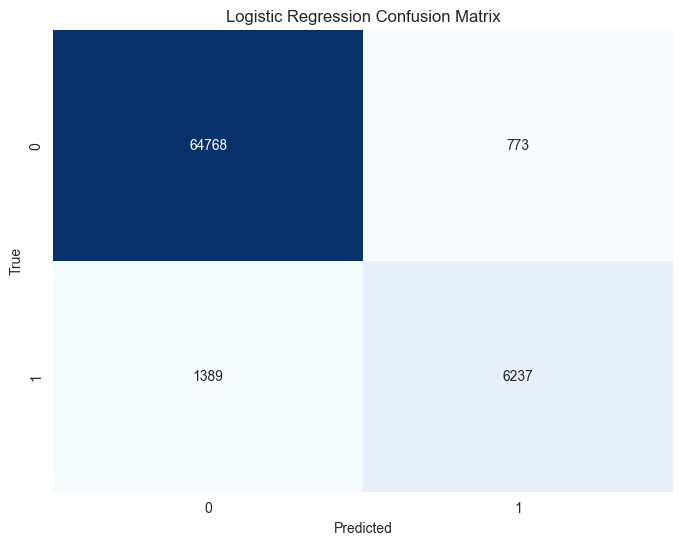


Cross-Validation Results for Logistic Regression:
Mean Accuracy: 97.05%
Standard Deviation: 0.16
Accuracy of the model on the test set: 97.20%


In [48]:
lr_precision = precision_score(y_train, lr_cv_predictions)
lr_recall = recall_score(y_train, lr_cv_predictions)
lr_f1 = f1_score(y_train, lr_cv_predictions)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_train, lr_cv_predictions))

plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Cross-validation results
print("\nCross-Validation Results for Logistic Regression:")
print(f"Mean Accuracy: {lr_cv_accuracy.mean()*100:.2f}%")
print(f"Standard Deviation: {lr_cv_accuracy.std()*100:.2f}")
print(f"Accuracy of the model on the test set: {lr_model.score(X_test, y_test)*100:.2f}%")

# Decision Tree Model

In [49]:
# Train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Cross-validation
dt_cv_accuracy = cross_val_score(dt_model, X_train, y_train, cv=5)
dt_cv_predictions = cross_val_predict(dt_model, X_train, y_train, cv=5)

# Confusion Matrix
dt_conf_matrix = confusion_matrix(y_train, dt_cv_predictions)

## Evaluation Metrics

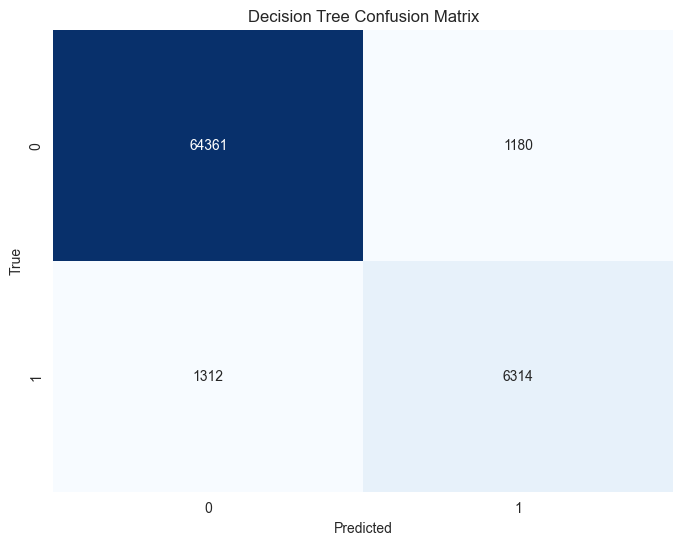


Cross-Validation Results for Decision Tree:
Mean Accuracy: 96.58%
Standard Deviation: 0.12
Accuracy of the model on the test set: 96.69%

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     65541
           1       0.84      0.83      0.84      7626

    accuracy                           0.97     73167
   macro avg       0.91      0.90      0.91     73167
weighted avg       0.97      0.97      0.97     73167


In [50]:
dt_precision = precision_score(y_train, dt_cv_predictions)
dt_recall = recall_score(y_train, dt_cv_predictions)
dt_f1 = f1_score(y_train, dt_cv_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Cross-validation results
print("\nCross-Validation Results for Decision Tree:")
print(f"Mean Accuracy: {dt_cv_accuracy.mean()*100:.2f}%")
print(f"Standard Deviation: {dt_cv_accuracy.std()*100:.2f}")
print(f"Accuracy of the model on the test set: {dt_model.score(X_test, y_test)*100:.2f}%")
print("\nClassification Report for Decision Tree:")
print(classification_report(y_train, dt_cv_predictions))